In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
# Load dataset
data = pd.read_csv("../dataset/trains_refined_regression.csv")

# Feature extraction
X = data[['train_ID', 'departure_time', 'arrival_time', 'train_type']]
y = data['delay']

In [78]:
# Dividi il dataset in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:

# Crea il modello di regressione lineare
linear_model = LinearRegression()

# Allena il modello
linear_model.fit(X_train, y_train)
# Effettua le predizioni
linear_y_pred = linear_model.predict(X_test)

In [80]:
# Results
print("--------------------- Linear Regression ---------------------\n")
print("RMSE:", mean_squared_error(y_test, linear_y_pred, squared=False))
print("R^2:",r2_score(y_test, linear_y_pred))
print("\n---------------------------------------------------------")

--------------------- Linear Regression ---------------------

RMSE: 7.245390538407914
R^2: 0.0704820284110309

---------------------------------------------------------


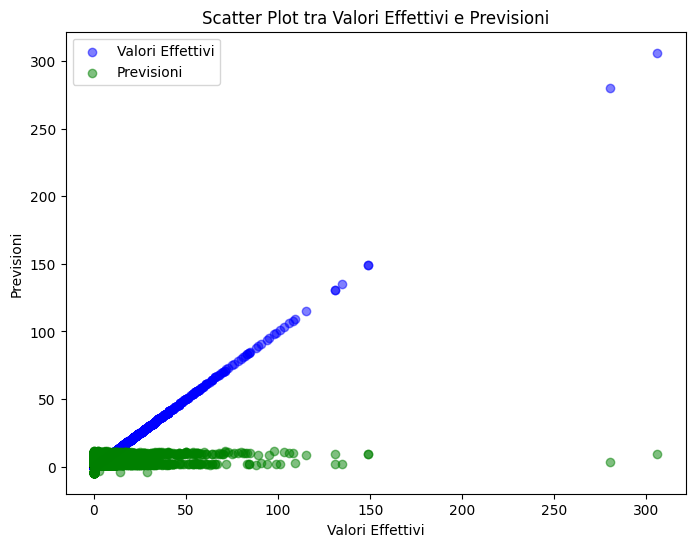

In [81]:
# Crea un grafico di dispersione tra valori effettivi e previsioni
import matplotlib.pyplot as plt
# Crea un grafico di dispersione con colori diversi per previsioni e valori effettivi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, alpha=0.5, label="Valori Effettivi", color='blue')
plt.scatter(y_test, linear_y_pred, alpha=0.5, label="Previsioni", color='green')
plt.xlabel("Valori Effettivi")
plt.ylabel("Previsioni")
plt.title("Scatter Plot tra Valori Effettivi e Previsioni")
plt.legend()

# Visualizza il grafico
plt.show()

In [82]:
random_forest_model = RandomForestRegressor(n_estimators=50, random_state=42, criterion="squared_error")
random_forest_model.fit(X_train, y_train)

# Effettua le previsioni
random_forest_y_pred = random_forest_model.predict(X_test)

In [94]:
# Results
print("--------------------- Random Forest Regressor ---------------------\n")
print("RMSE:", mean_squared_error(y_test, random_forest_y_pred, squared=False))
print("R^2:",r2_score(y_test, random_forest_y_pred))
print("\n---------------------------------------------------------")

--------------------- Random Forest Regressor ---------------------

RMSE: 4.853850564974868
R^2: 0.5828358348731455

---------------------------------------------------------


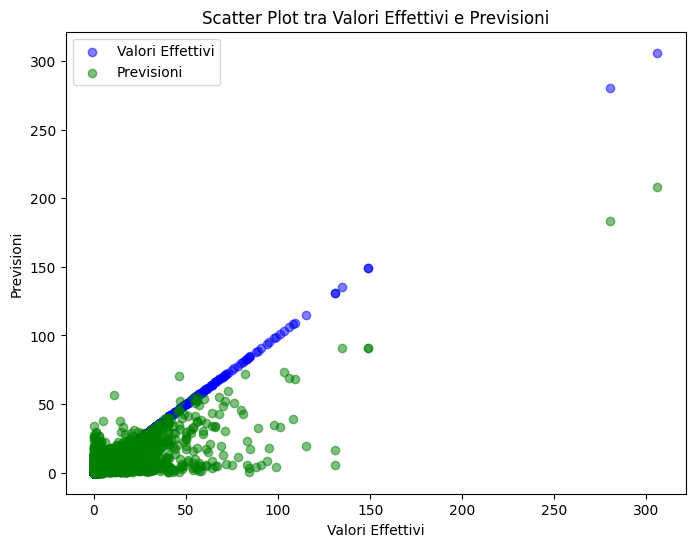

In [95]:
# Crea un grafico di dispersione tra valori effettivi e previsioni
import matplotlib.pyplot as plt
# Crea un grafico di dispersione con colori diversi per previsioni e valori effettivi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test, alpha=0.5, label="Valori Effettivi", color='blue')
plt.scatter(y_test, random_forest_y_pred, alpha=0.5, label="Previsioni", color='green')
plt.xlabel("Valori Effettivi")
plt.ylabel("Previsioni")
plt.title("Scatter Plot tra Valori Effettivi e Previsioni")
plt.legend()

# Visualizza il grafico
plt.show()

# OTHER TESTTTTT --------------------------

In [85]:
import warnings

test = pd.read_csv("testtttt.csv")
y_preddd = []
warnings.filterwarnings('ignore')
# Itera sulle righe del DataFrame
for index, row in test.iterrows():
    # Seleziona le colonne per l'input del modello
    input_features = row[['train_ID', 'departure_time', 'arrival_time', 'train_type']]
    
    # Esegui la previsione
    prediction = random_forest_model.predict([input_features]) 
    y_preddd.append(int(prediction[0])) 
    
    #print(int(prediction[0]), "---", row["delay"])

print(r2_score(test["delay"].values, y_preddd))
print(mean_squared_error(test["delay"].values, y_preddd))


0.24538258675954394
56.385979729729726


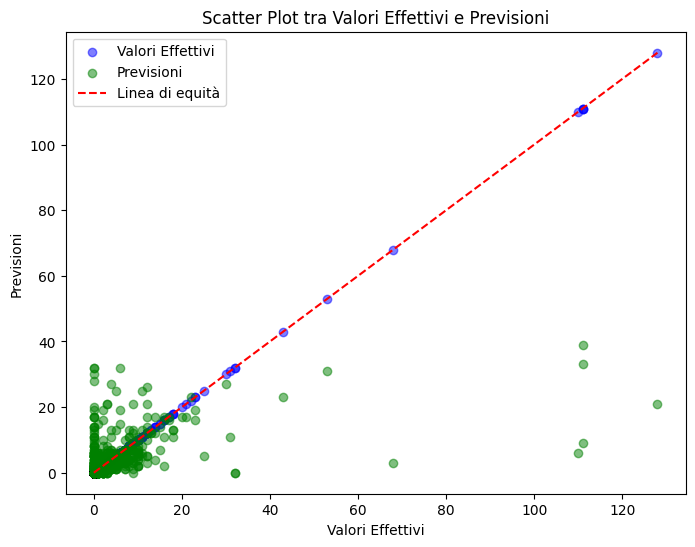

In [86]:
# Crea un grafico di dispersione tra valori effettivi e previsioni
import matplotlib.pyplot as plt
# Crea un grafico di dispersione con colori diversi per previsioni e valori effettivi
plt.figure(figsize=(8, 6))
plt.scatter(test["delay"].values, test["delay"].values, alpha=0.5, label="Valori Effettivi", color='blue')
plt.scatter(test["delay"].values, y_preddd, alpha=0.5, label="Previsioni", color='green')
plt.plot([min(test["delay"].values), max(test["delay"].values)], [min(test["delay"].values), max(test["delay"].values)], color='red', linestyle='--', label="Linea di equità")
plt.xlabel("Valori Effettivi")
plt.ylabel("Previsioni")
plt.title("Scatter Plot tra Valori Effettivi e Previsioni")
plt.legend()

# Visualizza il grafico
plt.show()
